In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
main_data = pd.read_csv('train.csv')
data = main_data.copy()
test_data = pd.read_csv('test.csv')
test_data_copy = test_data.copy()

In [ ]:
main_data.head()

,id,departure city,discount,price,no of items,location,class,segment,sub-class,delivery type,RID,profit,delivery date,address code,departure state,placement date
0,1,Houston,0.2,16.448,2,Central,kariox,Consumer,phone,Standard Class,7981,5.5512,2018-01-01,77095,Texas,2018-01-01
1,2,Westland,0.0,29.700,5,Central,kariox,Consumer,headset,Standard Class,6334,13.3650,2018-01-01,48185,Michigan,2018-01-01
2,3,Westland,0.0,14.730,3,Central,qexty,Consumer,shorts,Standard Class,6333,4.8609,2018-01-01,48185,Michigan,2018-01-01
3,4,Westland,0.0,43.920,3,Central,kariox,Consumer,television,Standard Class,6332,12.7368,2018-01-01,48185,Michigan,2018-01-01
4,5,Westland,0.0,66.580,2,Central,kariox,Consumer,laptop,Standard Class,6331,15.9792,2018-01-01,48185,Michigan,2018-01-01


In [ ]:
states = list(data['departure state'].unique())
states += list(test_data['departure state'].unique())
states = list(set(states))
print(len(states))

49


In [ ]:
data['delivery type'].fillna(value = 'Standard Class',inplace= True)

In [ ]:
data.describe()

,id,discount,price,no of items,RID,profit,address code
count,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000
mean,3350.500000,0.155876,234.424275,3.798507,4954.381791,29.121046,54719.073284
std,1934.267734,0.205922,641.440815,2.225327,2921.304952,230.712951,32092.421012
min,1.000000,0.000000,0.836000,1.000000,1.000000,-6599.978000,1040.000000
25%,1675.750000,0.000000,17.340000,2.000000,2389.750000,1.713750,22204.000000
50%,3350.500000,0.200000,54.960000,3.000000,4941.500000,8.803200,55113.000000
75%,5025.250000,0.200000,212.940000,5.000000,7507.250000,30.023400,90004.000000
max,6700.000000,0.800000,22638.480000,14.000000,9990.000000,8399.976000,99301.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6700 entries, 0 to 6699
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               6700 non-null   int64  
 1   departure city   6700 non-null   object 
 2   discount         6700 non-null   float64
 3   price            6700 non-null   float64
 4   no of items      6700 non-null   int64  
 5   location         6700 non-null   object 
 6   class            6700 non-null   object 
 7   segment          6700 non-null   object 
 8   sub-class        6700 non-null   object 
 9   delivery type    6700 non-null   object 
 10  RID              6700 non-null   int64  
 11  profit           6700 non-null   float64
 12  delivery date    6700 non-null   object 
 13  address code     6700 non-null   int64  
 14  departure state  6700 non-null   object 
 15  placement date   6700 non-null   object 
dtypes: float64(3), int64(4), object(9)
memory usage: 837.6+ KB


In [ ]:
data['delivery_days'] = (pd.to_datetime(data['delivery date'])-pd.to_datetime(data['placement date'])).dt.days

In [ ]:
data.head()

,id,departure city,discount,price,no of items,location,class,segment,sub-class,delivery type,RID,profit,delivery date,address code,departure state,placement date,delivery_days
0,1,Houston,0.2,16.448,2,Central,kariox,Consumer,phone,Standard Class,7981,5.5512,2018-01-01,77095,Texas,2018-01-01,0
1,2,Westland,0.0,29.700,5,Central,kariox,Consumer,headset,Standard Class,6334,13.3650,2018-01-01,48185,Michigan,2018-01-01,0
2,3,Westland,0.0,14.730,3,Central,qexty,Consumer,shorts,Standard Class,6333,4.8609,2018-01-01,48185,Michigan,2018-01-01,0
3,4,Westland,0.0,43.920,3,Central,kariox,Consumer,television,Standard Class,6332,12.7368,2018-01-01,48185,Michigan,2018-01-01,0
4,5,Westland,0.0,66.580,2,Central,kariox,Consumer,laptop,Standard Class,6331,15.9792,2018-01-01,48185,Michigan,2018-01-01,0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


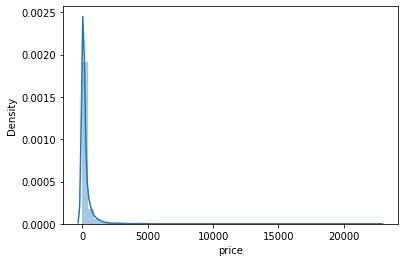

In [ ]:
sns.distplot(a = data['price'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


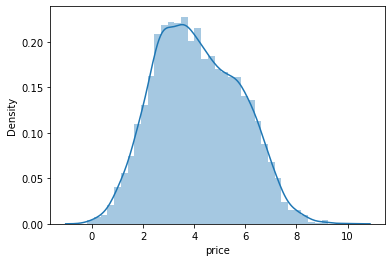

In [ ]:
sns.distplot(a = np.log(data['price']))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


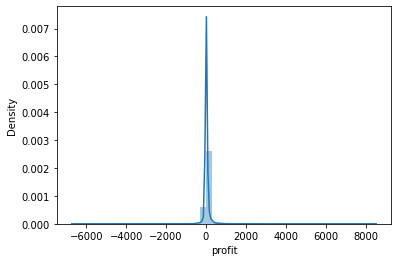

In [ ]:
sns.distplot(a = data['profit'])

In [ ]:
data.location.value_counts()

West       2118
East       1929
Central    1552
South      1101
Name: location, dtype: int64

In [ ]:
data['class'].value_counts()

kariox    4034
qexty     1437
fynota    1229
Name: class, dtype: int64

In [ ]:
data['segment'].value_counts()

Consumer       3523
Corporate      2048
Home Office    1129
Name: segment, dtype: int64

In [ ]:
data['sub-class'].value_counts()

headset       1025
phone          913
shorts         641
colddrinks     597
laptop         559
television     513
chocolates     502
tshirts        428
battery        303
tablet         250
hoodies        216
watch          185
lighting       155
pants          152
charger        131
sweets          83
fastfood        47
Name: sub-class, dtype: int64

In [ ]:
data['delivery type'].value_counts()

Standard Class    4087
Second Class      1290
First Class        966
Same Day           357
Name: delivery type, dtype: int64

In [ ]:
data['departure state'].value_counts()

California              1339
New York                 777
Texas                    668
Pennsylvania             390
Illinois                 323
Ohio                     307
Washington               296
Florida                  255
Michigan                 192
Virginia                 181
North Carolina           164
Arizona                  156
Georgia                  123
Colorado                 121
Tennessee                102
Massachusetts             96
Oregon                    94
Indiana                   88
Kentucky                  88
New Jersey                87
Wisconsin                 77
Delaware                  77
Maryland                  68
Minnesota                 51
Oklahoma                  49
Connecticut               48
Alabama                   45
Arkansas                  41
Missouri                  40
Mississippi               40
Utah                      38
Rhode Island              35
South Carolina            34
Nevada                    31
Nebraska      

In [ ]:
data['actual_price'] = np.log((1-data['discount'])*data['price'])

In [ ]:
data['price'] = np.log(data['price'])

In [ ]:
data.head()

,id,departure city,discount,price,no of items,location,class,segment,sub-class,delivery type,RID,profit,delivery date,address code,departure state,placement date,delivery_days,actual_price
0,1,Houston,0.2,2.800204,2,Central,kariox,Consumer,phone,Standard Class,7981,5.5512,2018-01-01,77095,Texas,2018-01-01,0,2.577060
1,2,Westland,0.0,3.391147,5,Central,kariox,Consumer,headset,Standard Class,6334,13.3650,2018-01-01,48185,Michigan,2018-01-01,0,3.391147
2,3,Westland,0.0,2.689886,3,Central,qexty,Consumer,shorts,Standard Class,6333,4.8609,2018-01-01,48185,Michigan,2018-01-01,0,2.689886
3,4,Westland,0.0,3.782370,3,Central,kariox,Consumer,television,Standard Class,6332,12.7368,2018-01-01,48185,Michigan,2018-01-01,0,3.782370
4,5,Westland,0.0,4.198404,2,Central,kariox,Consumer,laptop,Standard Class,6331,15.9792,2018-01-01,48185,Michigan,2018-01-01,0,4.198404


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


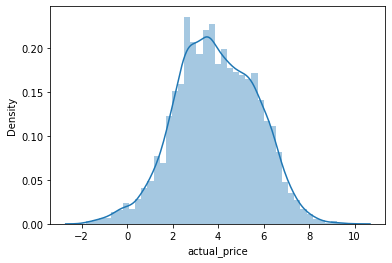

In [ ]:
sns.distplot(a = data['actual_price'])

In [ ]:
data.columns

Index(['id', 'departure city', 'discount', 'price', 'no of items', 'location',
       'class', 'segment', 'sub-class', 'delivery type', 'RID', 'profit',
       'delivery date', 'address code', 'departure state', 'placement date',
       'delivery_days', 'actual_price'],
      dtype='object')

In [ ]:
num_features = ['discount', 'price', 'no of items','id','RID','profit','delivery_days','actual_price']

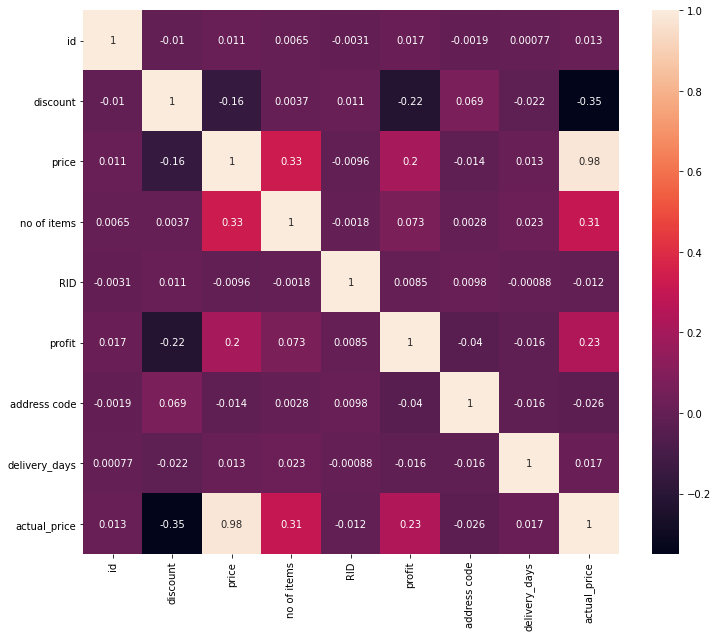

In [ ]:
fig,ax = plt.subplots(figsize = (12,10))
sns.heatmap(data = data.corr(),annot = True,ax= ax)

In [ ]:
data.head()

,id,departure city,discount,price,no of items,location,class,segment,sub-class,delivery type,RID,profit,delivery date,address code,departure state,placement date,delivery_days,actual_price
0,1,Houston,0.2,2.800204,2,Central,kariox,Consumer,phone,Standard Class,7981,5.5512,2018-01-01,77095,Texas,2018-01-01,0,2.577060
1,2,Westland,0.0,3.391147,5,Central,kariox,Consumer,headset,Standard Class,6334,13.3650,2018-01-01,48185,Michigan,2018-01-01,0,3.391147
2,3,Westland,0.0,2.689886,3,Central,qexty,Consumer,shorts,Standard Class,6333,4.8609,2018-01-01,48185,Michigan,2018-01-01,0,2.689886
3,4,Westland,0.0,3.782370,3,Central,kariox,Consumer,television,Standard Class,6332,12.7368,2018-01-01,48185,Michigan,2018-01-01,0,3.782370
4,5,Westland,0.0,4.198404,2,Central,kariox,Consumer,laptop,Standard Class,6331,15.9792,2018-01-01,48185,Michigan,2018-01-01,0,4.198404


In [ ]:
one_hot_encoded = ['location','class', 'segment', 'sub-class', 'delivery type']

In [ ]:
data = pd.get_dummies(data = data,columns = one_hot_encoded) 

In [ ]:
data = pd.concat([data,pd.get_dummies(states)],axis = 1)
data.head()

,id,departure city,discount,price,no of items,RID,profit,delivery date,address code,departure state,placement date,delivery_days,actual_price,location_Central,location_East,location_South,location_West,class_fynota,class_kariox,class_qexty,segment_Consumer,segment_Corporate,segment_Home Office,sub-class_battery,sub-class_charger,sub-class_chocolates,sub-class_colddrinks,sub-class_fastfood,sub-class_headset,sub-class_hoodies,sub-class_laptop,sub-class_lighting,sub-class_pants,sub-class_phone,sub-class_shorts,sub-class_sweets,sub-class_tablet,sub-class_television,sub-class_tshirts,sub-class_watch,...,Georgia,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,1,Houston,0.2,2.800204,2,7981,5.5512,2018-01-01,77095,Texas,2018-01-01,0,2.577060,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Westland,0.0,3.391147,5,6334,13.3650,2018-01-01,48185,Michigan,2018-01-01,0,3.391147,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,3,Westland,0.0,2.689886,3,6333,4.8609,2018-01-01,48185,Michigan,2018-01-01,0,2.689886,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,Westland,0.0,3.782370,3,6332,12.7368,2018-01-01,48185,Michigan,2018-01-01,0,3.782370,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,Westland,0.0,4.198404,2,6331,15.9792,2018-01-01,48185,Michigan,2018-01-01,0,4.198404,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
for col in states:
  data[col].values[:] = 0
for col in states:
  data[col] = data[col].astype(int)

In [ ]:
data.head()

,id,departure city,discount,price,no of items,RID,profit,delivery date,address code,departure state,placement date,delivery_days,actual_price,location_Central,location_East,location_South,location_West,class_fynota,class_kariox,class_qexty,segment_Consumer,segment_Corporate,segment_Home Office,sub-class_battery,sub-class_charger,sub-class_chocolates,sub-class_colddrinks,sub-class_fastfood,sub-class_headset,sub-class_hoodies,sub-class_laptop,sub-class_lighting,sub-class_pants,sub-class_phone,sub-class_shorts,sub-class_sweets,sub-class_tablet,sub-class_television,sub-class_tshirts,sub-class_watch,...,Georgia,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,1,Houston,0.2,2.800204,2,7981,5.5512,2018-01-01,77095,Texas,2018-01-01,0,2.577060,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,Westland,0.0,3.391147,5,6334,13.3650,2018-01-01,48185,Michigan,2018-01-01,0,3.391147,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,Westland,0.0,2.689886,3,6333,4.8609,2018-01-01,48185,Michigan,2018-01-01,0,2.689886,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,Westland,0.0,3.782370,3,6332,12.7368,2018-01-01,48185,Michigan,2018-01-01,0,3.782370,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,Westland,0.0,4.198404,2,6331,15.9792,2018-01-01,48185,Michigan,2018-01-01,0,4.198404,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
for i in range(data.shape[0]):
  name = data.loc[i,'departure state']
  data.loc[i,name] = 1

In [ ]:
data.head()

,id,departure city,discount,price,no of items,RID,profit,delivery date,address code,departure state,placement date,delivery_days,actual_price,location_Central,location_East,location_South,location_West,class_fynota,class_kariox,class_qexty,segment_Consumer,segment_Corporate,segment_Home Office,sub-class_battery,sub-class_charger,sub-class_chocolates,sub-class_colddrinks,sub-class_fastfood,sub-class_headset,sub-class_hoodies,sub-class_laptop,sub-class_lighting,sub-class_pants,sub-class_phone,sub-class_shorts,sub-class_sweets,sub-class_tablet,sub-class_television,sub-class_tshirts,sub-class_watch,...,Georgia,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,1,Houston,0.2,2.800204,2,7981,5.5512,2018-01-01,77095,Texas,2018-01-01,0,2.577060,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2,Westland,0.0,3.391147,5,6334,13.3650,2018-01-01,48185,Michigan,2018-01-01,0,3.391147,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,Westland,0.0,2.689886,3,6333,4.8609,2018-01-01,48185,Michigan,2018-01-01,0,2.689886,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,Westland,0.0,3.782370,3,6332,12.7368,2018-01-01,48185,Michigan,2018-01-01,0,3.782370,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,Westland,0.0,4.198404,2,6331,15.9792,2018-01-01,48185,Michigan,2018-01-01,0,4.198404,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
data.columns

Index(['id', 'departure city', 'discount', 'price', 'no of items', 'RID',
       'profit', 'delivery date', 'address code', 'departure state',
       'placement date', 'delivery_days', 'actual_price', 'location_Central',
       'location_East', 'location_South', 'location_West', 'class_fynota',
       'class_kariox', 'class_qexty', 'segment_Consumer', 'segment_Corporate',
       'segment_Home Office', 'sub-class_battery', 'sub-class_charger',
       'sub-class_chocolates', 'sub-class_colddrinks', 'sub-class_fastfood',
       'sub-class_headset', 'sub-class_hoodies', 'sub-class_laptop',
       'sub-class_lighting', 'sub-class_pants', 'sub-class_phone',
       'sub-class_shorts', 'sub-class_sweets', 'sub-class_tablet',
       'sub-class_television', 'sub-class_tshirts', 'sub-class_watch',
       'delivery type_First Class', 'delivery type_Same Day',
       'delivery type_Second Class', 'delivery type_Standard Class', 'Alabama',
       'Arizona', 'Arkansas', 'California', 'Colorado', 'Con

In [ ]:
data.drop(columns = ['id','departure city','RID','delivery date','placement date','departure state'],inplace = True)

In [ ]:
data.head()

,discount,price,no of items,profit,address code,delivery_days,actual_price,location_Central,location_East,location_South,location_West,class_fynota,class_kariox,class_qexty,segment_Consumer,segment_Corporate,segment_Home Office,sub-class_battery,sub-class_charger,sub-class_chocolates,sub-class_colddrinks,sub-class_fastfood,sub-class_headset,sub-class_hoodies,sub-class_laptop,sub-class_lighting,sub-class_pants,sub-class_phone,sub-class_shorts,sub-class_sweets,sub-class_tablet,sub-class_television,sub-class_tshirts,sub-class_watch,delivery type_First Class,delivery type_Same Day,delivery type_Second Class,delivery type_Standard Class,Alabama,Arizona,...,Georgia,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,0.2,2.800204,2,5.5512,77095,0,2.577060,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0.0,3.391147,5,13.3650,48185,0,3.391147,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.0,2.689886,3,4.8609,48185,0,2.689886,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.0,3.782370,3,12.7368,48185,0,3.782370,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.0,4.198404,2,15.9792,48185,0,4.198404,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_Y,test_Y = train_test_split(data.drop(columns = ['profit']),data['profit'],test_size = 0.2,random_state = 14)

In [ ]:
train_data_X = data.drop(columns = ['profit'])
train_data_Y = data['profit']

In [ ]:
train_data_X.shape

(6700, 86)

In [ ]:
train_data_Y.shape

(6700,)

In [ ]:
import xgboost as xgb
xgb_regressor = xgb.XGBRegressor(n_estimators = 1000)
xgb_regressor.fit(train_data_X,train_data_Y)

[04:26:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
test_Y.shape

(1340,)

In [ ]:
pred = xgb_regressor.predict(test_X)
from sklearn.metrics import r2_score
score = r2_score(test_Y,pred)
print(score)

0.8515949775118694


In [ ]:
pred_train = xgb_regressor.predict(train_X)
from sklearn.metrics import r2_score
score = r2_score(train_Y,pred_train)
print(score)

0.9956655843507188


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 1000)
rfr.fit(train_X,train_Y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
pred = rfr.predict(test_X)
from sklearn.metrics import r2_score
score = r2_score(test_Y,pred)
print(score)

0.7146881480054833


In [ ]:
pred_train = rfr.predict(train_X)
from sklearn.metrics import r2_score
score = r2_score(train_Y,pred_train)
print(score)

0.9235884403200942


In [ ]:
data.corr()

,discount,price,no of items,profit,address code,delivery_days,actual_price,location_Central,location_East,location_South,location_West,class_fynota,class_kariox,class_qexty,segment_Consumer,segment_Corporate,segment_Home Office,sub-class_battery,sub-class_charger,sub-class_chocolates,sub-class_colddrinks,sub-class_fastfood,sub-class_headset,sub-class_hoodies,sub-class_laptop,sub-class_lighting,sub-class_pants,sub-class_phone,sub-class_shorts,sub-class_sweets,sub-class_tablet,sub-class_television,sub-class_tshirts,sub-class_watch,delivery type_First Class,delivery type_Same Day,delivery type_Second Class,delivery type_Standard Class,departure state_Alabama,departure state_Arizona,...,departure state_District of Columbia,departure state_Florida,departure state_Georgia,departure state_Idaho,departure state_Illinois,departure state_Indiana,departure state_Iowa,departure state_Kansas,departure state_Kentucky,departure state_Louisiana,departure state_Maine,departure state_Maryland,departure state_Massachusetts,departure state_Michigan,departure state_Minnesota,departure state_Mississippi,departure state_Missouri,departure state_Montana,departure state_Nebraska,departure state_Nevada,departure state_New Hampshire,departure state_New Jersey,departure state_New Mexico,departure state_New York,departure state_North Carolina,departure state_Ohio,departure state_Oklahoma,departure state_Oregon,departure state_Pennsylvania,departure state_Rhode Island,departure state_South Carolina,departure state_South Dakota,departure state_Tennessee,departure state_Texas,departure state_Utah,departure state_Vermont,departure state_Virginia,departure state_Washington,departure state_Wisconsin,departure state_Wyoming
discount,1.000000,-0.159390,0.003662,-0.220115,0.068656,-0.022064,-0.349838,0.224564,-0.036636,-0.027325,-0.146303,-0.052389,-0.000747,0.050288,0.010217,0.007609,-0.022994,0.004429,-0.052457,-0.102009,-0.009307,0.002378,0.441044,0.090614,-0.120405,-0.049958,0.039562,-0.161242,-0.020495,0.081669,-0.080962,-0.116032,0.019519,-0.063865,0.006508,-0.004511,-0.026749,0.019014,-0.062250,0.106628,...,-0.026174,0.151539,-0.103526,-0.010318,0.260061,-0.087334,-0.034641,-0.039291,-0.087334,-0.049041,-0.026174,-0.072316,-0.082124,-0.123076,-0.066300,-0.058668,-0.058668,-0.018767,-0.049041,-0.034523,-0.037436,-0.082988,-0.014388,-0.170051,0.097740,0.181465,-0.064978,0.069936,0.205282,-0.048825,-0.054065,-0.018503,0.092356,0.337980,-0.039800,-0.026174,-0.126142,-0.094321,-0.081626,0.002618
price,-0.159390,1.000000,0.326462,0.204254,-0.014427,0.013341,0.979576,-0.045765,0.010880,-0.003371,0.033616,0.303717,-0.476341,0.281656,0.009012,-0.005327,-0.005465,0.048978,-0.054526,0.091275,0.220684,0.152233,-0.265991,0.220821,0.134557,-0.167636,0.160238,-0.161824,-0.053986,0.162167,-0.155999,-0.219528,0.280623,-0.052382,-0.000526,-0.003473,0.014361,-0.009632,0.028074,-0.016380,...,-0.001186,-0.034920,0.008706,0.004723,-0.048884,0.007420,0.003718,0.000634,0.011750,-0.000457,0.008522,0.010934,0.016951,0.022543,0.024038,0.005517,0.007874,0.008725,-0.011255,0.014682,0.014739,0.011986,-0.010862,0.036320,-0.018148,-0.027819,0.011884,-0.002472,-0.036513,0.032179,0.007270,-0.022916,-0.031311,-0.067943,0.007660,0.026708,0.037134,0.015702,0.040240,0.024092
no of items,0.003662,0.326462,1.000000,0.072958,0.002839,0.023239,0.305338,0.004407,-0.017380,0.019339,-0.002487,-0.012195,-0.009206,0.022477,-0.019766,0.013927,0.009226,-0.022579,-0.020640,-0.000726,-0.014529,-0.010070,0.003453,0.012350,0.003550,0.037583,0.006589,0.001948,0.007105,0.004077,0.000840,-0.013025,0.016249,-0.013396,-0.014390,-0.018237,-0.006987,0.024410,0.023049,0.006864,...,0.003131,-0.004073,0.002890,-0.017347,-0.000601,0.008679,0.011488,-0.017329,0.001609,-0.000372,0.008958,0.003815,-0.006015,-0.012187,-0.000559,0.008759,-0.011267,-0.003201,-0.001412,0.013092,0.014791,-0.009758,-0.005645,-0.009100,0.010871,-0.004537,-0.002462,0.018786,-0.011865,-0.008326,0.007411,-0.014263,-0.005723,0.006402,0.018450,0.01478

In [ ]:
def plot_feature_importance(importance,names):

#Create arrays from feature importance and feature names
   feature_importance = np.array(importance)
   feature_names = np.array(names)

#Create a DataFrame using a Dictionary
   data={'feature_names':feature_names,'feature_importance':feature_importance}
   fi_df = pd.DataFrame(data)
   print(fi_df)

#Sort the DataFrame in order decreasing feature importance
   fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

#Define size of bar plot
   plt.figure(figsize=(10,8))
#Plot Searborn bar chart
   sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])

                 feature_names  feature_importance
0                     discount            0.217228
1                        price            0.047385
2                  no of items            0.017967
3                 address code            0.006119
4                delivery_days            0.001071
..                         ...                 ...
79     departure state_Vermont            0.000279
80    departure state_Virginia            0.001428
81  departure state_Washington            0.000000
82   departure state_Wisconsin            0.000000
83     departure state_Wyoming            0.000113

[84 rows x 2 columns]


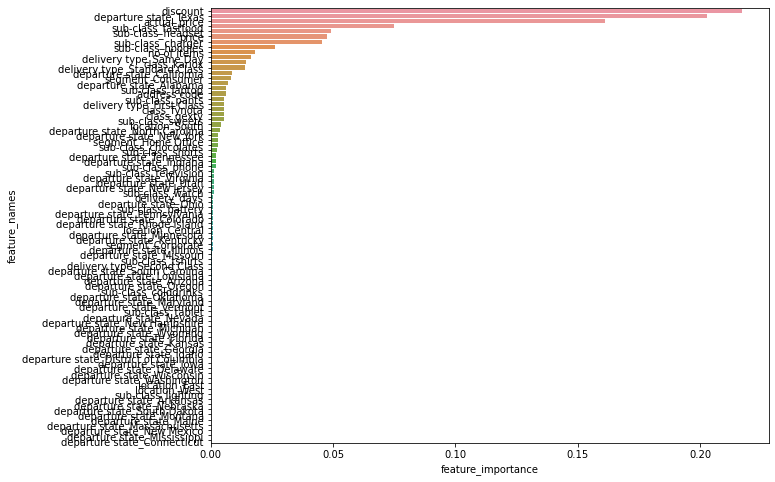

In [ ]:
plot_feature_importance(xgb_regressor.feature_importances_,train_X.columns)

In [ ]:
test_data.head()

,id,departure city,discount,price,no of items,location,class,segment,sub-class,delivery type,RID,delivery date,address code,departure state,placement date
0,6701,San Francisco,0.0,24.200,5,West,kariox,Consumer,television,Standard Class,2408,2021-01-01,94122,California,2021-01-01
1,6702,San Francisco,0.2,359.976,3,West,fynota,Consumer,colddrinks,Standard Class,2409,2021-01-01,94122,California,2021-01-01
2,6703,Waterbury,0.0,3.520,2,East,kariox,Consumer,television,Standard Class,5425,2021-01-01,6708,Connecticut,2021-01-01
3,6704,Chicago,0.2,11.520,5,Central,kariox,Consumer,tablet,First Class,7408,2021-01-01,60653,Illinois,2021-01-01
4,6705,Seattle,0.0,242.940,3,West,kariox,Home Office,laptop,Standard Class,733,2021-01-01,98115,Washington,2021-01-01


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3294 entries, 0 to 3293
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3294 non-null   int64  
 1   departure city   3294 non-null   object 
 2   discount         3294 non-null   float64
 3   price            3294 non-null   float64
 4   no of items      3294 non-null   int64  
 5   location         3294 non-null   object 
 6   class            3294 non-null   object 
 7   segment          3294 non-null   object 
 8   sub-class        3294 non-null   object 
 9   delivery type    3294 non-null   object 
 10  RID              3294 non-null   int64  
 11  delivery date    3294 non-null   object 
 12  address code     3294 non-null   int64  
 13  departure state  3294 non-null   object 
 14  placement date   3294 non-null   object 
dtypes: float64(2), int64(4), object(9)
memory usage: 386.1+ KB


In [ ]:
test_data['delivery_days'] = (pd.to_datetime(test_data['delivery date'])-pd.to_datetime(test_data['placement date'])).dt.days

In [ ]:
test_data['actual_price'] = np.log((1-test_data['discount'])*test_data['price'])

In [ ]:
test_data['price'] = np.log(test_data['price'])

In [ ]:
test_data = pd.get_dummies(data = test_data,columns = one_hot_encoded) 

In [ ]:
test_data = pd.concat([test_data,pd.get_dummies(states)],axis = 1)

In [ ]:
for col in states:
  test_data[col].values[:] = 0
for col in states:
  test_data[col] = test_data[col].astype(int)

In [ ]:
for i in range(test_data.shape[0]):
  name = test_data.loc[i,'departure state']
  test_data.loc[i,name] = 1

In [ ]:
test_data.head()

,id,departure city,discount,price,no of items,RID,delivery date,address code,departure state,placement date,delivery_days,actual_price,location_Central,location_East,location_South,location_West,class_fynota,class_kariox,class_qexty,segment_Consumer,segment_Corporate,segment_Home Office,sub-class_battery,sub-class_charger,sub-class_chocolates,sub-class_colddrinks,sub-class_fastfood,sub-class_headset,sub-class_hoodies,sub-class_laptop,sub-class_lighting,sub-class_pants,sub-class_phone,sub-class_shorts,sub-class_sweets,sub-class_tablet,sub-class_television,sub-class_tshirts,sub-class_watch,delivery type_First Class,...,Georgia,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,6701,San Francisco,0.0,3.186353,5,2408,2021-01-01,94122,California,2021-01-01,0,3.186353,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,6702,San Francisco,0.2,5.886037,3,2409,2021-01-01,94122,California,2021-01-01,0,5.662894,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6703,Waterbury,0.0,1.258461,2,5425,2021-01-01,6708,Connecticut,2021-01-01,0,1.258461,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,6704,Chicago,0.2,2.444085,5,7408,2021-01-01,60653,Illinois,2021-01-01,0,2.220941,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,6705,Seattle,0.0,5.492814,3,733,2021-01-01,98115,Washington,2021-01-01,0,5.492814,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
test_data.drop(columns = ['id','departure city','RID','delivery date','placement date','departure state'],inplace = True)

In [ ]:
test_data.head()

,discount,price,no of items,address code,delivery_days,actual_price,location_Central,location_East,location_South,location_West,class_fynota,class_kariox,class_qexty,segment_Consumer,segment_Corporate,segment_Home Office,sub-class_battery,sub-class_charger,sub-class_chocolates,sub-class_colddrinks,sub-class_fastfood,sub-class_headset,sub-class_hoodies,sub-class_laptop,sub-class_lighting,sub-class_pants,sub-class_phone,sub-class_shorts,sub-class_sweets,sub-class_tablet,sub-class_television,sub-class_tshirts,sub-class_watch,delivery type_First Class,delivery type_Same Day,delivery type_Second Class,delivery type_Standard Class,Alabama,Arizona,Arkansas,...,Georgia,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,0.0,3.186353,5,94122,0,3.186353,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.2,5.886037,3,94122,0,5.662894,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.0,1.258461,2,6708,0,1.258461,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.2,2.444085,5,60653,0,2.220941,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.0,5.492814,3,98115,0,5.492814,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
train_data_X.head()

,discount,price,no of items,address code,delivery_days,actual_price,location_Central,location_East,location_South,location_West,class_fynota,class_kariox,class_qexty,segment_Consumer,segment_Corporate,segment_Home Office,sub-class_battery,sub-class_charger,sub-class_chocolates,sub-class_colddrinks,sub-class_fastfood,sub-class_headset,sub-class_hoodies,sub-class_laptop,sub-class_lighting,sub-class_pants,sub-class_phone,sub-class_shorts,sub-class_sweets,sub-class_tablet,sub-class_television,sub-class_tshirts,sub-class_watch,delivery type_First Class,delivery type_Same Day,delivery type_Second Class,delivery type_Standard Class,Alabama,Arizona,Arkansas,...,Georgia,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,0.2,2.800204,2,77095,0,2.577060,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0.0,3.391147,5,48185,0,3.391147,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.0,2.689886,3,48185,0,2.689886,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.0,3.782370,3,48185,0,3.782370,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.0,4.198404,2,48185,0,4.198404,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
predictions = xgb_regressor.predict(test_data)

In [ ]:
submission = pd.concat([test_data_copy['id'].apply(int),pd.DataFrame(data = predictions,columns = ['profit'])],axis = 1)
submission.head()

,id,profit
0,6701,10.154259
1,6702,38.769485
2,6703,2.104553
3,6704,2.322358
4,6705,18.521832


In [ ]:
submission.to_csv('submission.csv',index = False)